##### Copyright 2019 The TensorFlow Authors.

### Setup

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
# # To generate GIFs
# !pip install imageio
#!pip install git+https://github.com/tensorflow/docs

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
# # -*- coding: utf-8 -*-
# """
# Created on Sun May  9 10:37:25 2021

# @author: Hammad Bashir
# """

# # -*- coding: utf-8 -*-
# """oneshotlearning.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/19G1rIljoPk8BSiSAqtilSSsKwvMC0mIb

# Here I tried to explain the code. In text segment and some in comments parts too.

# All libraires included.
# """
# import tensorflow.keras as keras
# import tensorflow as tf


# from keras.datasets import mnist
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
# from tensorflow.keras.layers import Conv2D, Activation,AveragePooling2D
# from keras import backend as K


# import numpy as np
# import random
# import numpy as np
# import pickle
# import cv2
# from os import listdir
# from sklearn.preprocessing import LabelBinarizer
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation, Flatten, Dropout, Dense
# from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
# from keras.preprocessing import image
# from keras.preprocessing.image import img_to_array
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# """

# 1.   Learning rate is defined
# 2.   Height width and default image size is 200.
# 1.   I pass images to this data set after resize using intercubic method (shown in previous discussion) that is more authentic as some image size are to increased.





# """

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if image is not None :
           return image
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

# """

# *   data list is initlized to get images in it
# *   label list is to initilized to get label of each image parallel
# *   Folder contains the subroots of my path. (s1=healty,s2=nutrients deficient etc)
# """

# import os
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# data = []
# label = []

# Folders = [



# 's1',

# 's2',
# 's3',
# 's4',

# 's5',
# 's6',
# 's7',
# 's8',
# 's9',
# 's10',

# 's12',
# 's13'





# ]
# label_val = 0

# path="/content/drive/MyDrive/faisal13foldertrain/"

# """

# 1.   Two loops. One folder inside path and other for images inside subroot
# 2.   data list was appending images each time
# 3.   At each loop i print the shape of data
# 4.   label was added (increased) each time when one folder images was completely extracted.

# """

# for files in Folders:
#     cpath = os.path.join(path, files)
    
#     for img in os.listdir(cpath):
        
#         data.append(convert_image_to_array(os.path.join(cpath, img)))
       
#         # arr1 = np.array(data)
       
#         # print(arr1.shape)
        
#         label.append(label_val)
   
#     label_val = label_val+1

# """

# 1.   each list is converted as numpy array
# 2.   Test train split to split the data
# 3.   numclasses dsecribe how many subfolder or classes are there.

# """

# train_images = np.asarray(data)
# train_labels = np.asarray(label)


### Load and prepare the dataset

You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data.

In [ ]:
#(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
path='/content/drive/MyDrive/Tomato__Tomato_YellowLeaf__Curl_Virus/'
from PIL import Image

train_images=[]
data_size=800
import os
i=1
for filename in os.listdir(path):
      if(i==1300):
        break
      try:
        image=Image.open(path+filename)
        train_images.append((np.asarray(image)-127.5)/127.5)
        #train_images.append(np.array(((image) * 127.5 + 127.5),np.int16))
       
        # train_images = np.array(train_images)

        print(i)
        i+=1
      except Exception as e:
        print("error")


      


# for i in range (1,data_size):
#   for j in range(amplification):
    
#     image=Image.open(path+'{}.JPG'.format(i))
#     train_images.append((np.asarray(image)-127.5)/127.5 )
# print(train_images)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
train_images[0].shape

(256, 256, 3)

In [ ]:
BUFFER_SIZE = 6000
BATCH_SIZE = 36

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
train_dataset

<BatchDataset shapes: (None, 256, 256, 3), types: tf.float64>

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16*16*512, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((16,16,512)))
    assert model.output_shape == (None, 16,16,512)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 64, 64, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 128, 128, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 256, 256, 3)
    # model = tf.keras.Sequential()
    # model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Reshape((7, 7, 256)))
    # assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    # model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    # assert model.output_shape == (None, 7, 7, 128)
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    # assert model.output_shape == (None, 14, 14, 64)
    # model.add(layers.BatchNormalization())
    # model.add(layers.LeakyReLU())

    # model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # assert model.output_shape == (None, 28, 28, 1)

    return model
    


   

Use the (as yet untrained) generator to create an image.

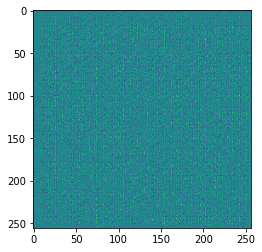

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

### The Discriminator

The discriminator is a CNN-based image classifier.

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[256, 256, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[256, 256, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(32))
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[7.582428e-05]], shape=(1, 1), dtype=float32)


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since you will train two networks separately.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 32

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs,n):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed,n)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
import cv2
import random
from PIL import Image 
import PIL

def generate_and_save_images(model, epoch, test_input,n):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  k=0
  
  s=random.randint(1, 31)
  data1=(np.array((predictions[s,:,:,:] * 127.5 + 127.5),np.int32))
  cv2.imwrite('/content/drive/MyDrive/2300imagesGAN/image{:04d}.png'.format(epoch),data1)
  n=n+1
   
 
  # if(epoch==5):
  #     k=random.randint(1,5000)
  #     prediction= predictions.save('image_0m41.png')
  #     #cv2.imwrite('image_0m41.png',predictions)
  #     i=+1
  print(predictions.shape)
  fig = plt.figure(figsize=(8, 8))

  for i in range(predictions.shape[0]):
      plt.subplot(8, 8, i+1)
      plt.imshow(np.array((predictions[i, :, :, :] * 127.5 + 127.5),np.int32))
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

In [ ]:
n=0
train(train_dataset, EPOCHS,n)

Restore the latest checkpoint.

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

## Create a GIF


In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

Use `imageio` to create an animated gif using the images saved during training.

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:

import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)